In [80]:
# 1 Analizar la correlación entre las variables.
import pandas as pd

data = pd.read_csv('Advertising.csv')

correlation_matrix = data.corr()
print(correlation_matrix)

# Analysis of Correlation Coefficients

# TV and Sales: 
# The correlation coefficient of 0.782224 shows a strong relationship between TV advertising budgets and sales.
# TV advertisements generate more sales.

# Radio and Sales:
# There is a semi-strong relationship of 0.576223 between Radio advertising and Sales,
# indicating that radio advertising also positively impacts sales.

# Newspaper and Sales:
# The correlation coefficient of 0.228299 shows a weak relationship between Newspaper advertising and Sales.

# TV and Radio:
# The correlation coefficient of 0.054809 indicates a very weak positive relationship between TV and Radio advertising budgets.

# TV and Newspaper: 
# The correlation coefficient of 0.056648 between TV and Newspaper advertising is also very weak.

# Radio and Newspaper: 
# The correlation coefficient of 0.354104 indicates a moderate relationship between Radio and Newspaper advertising budgets.


            Unnamed: 0        TV     Radio  Newspaper     Sales
Unnamed: 0    1.000000  0.017715 -0.110680  -0.154944 -0.051616
TV            0.017715  1.000000  0.054809   0.056648  0.782224
Radio        -0.110680  0.054809  1.000000   0.354104  0.576223
Newspaper    -0.154944  0.056648  0.354104   1.000000  0.228299
Sales        -0.051616  0.782224  0.576223   0.228299  1.000000


In [81]:
# 2 Realizar los modelos de regresión lineal simple.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np


class SimpleLinearRegression:
    """
    Simple Linear Regression using least squares method.
    """

    def __init__(self):
        self.intercept_ = None
        self.coef_ = None

    def fit(self, X, y):
        """
        Fit the model to the data (X, y).
        """
        #  column of ones to X to calculate the intercept term
        X_with_intercept = np.c_[np.ones(X.shape[0]), X]

        beta_hat = np.linalg.inv(X_with_intercept.T.dot(X_with_intercept)).dot(X_with_intercept.T).dot(y)

        # The intercept is the first term, the coefficient is the second term
        self.intercept_ = beta_hat[0]
        self.coef_ = beta_hat[1:]

    def predict(self, X):
        """
        Make predictions using the fitted model.
        """
        return self.intercept_ + self.coef_ * X

    def score(self, X, y):
        """
        Calculate the Mean Squared Error (MSE) of the model.
        """
        predictions = self.predict(X)
        mse = ((predictions - y) ** 2).mean()
        return mse

# Select a single predictor for simple linear regression
X = data[['TV']]
y = data['Sales']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
simple_model = LinearRegression()
simple_model.fit(X_train, y_train)


LinearRegression()

In [82]:
# 3 Realizar el modelo de regresión lineal múltiple.

class MultipleLinearRegression:
    """
    Multiple Linear Regression using the least squares method.
    """

    def __init__(self):
        self.intercept_ = None
        self.coef_ = None

    def fit(self, X, y):
        """
        Fit the model to the data (X, y).
        """
        # Adding a column of ones to X to calculate the intercept term
        X_with_intercept = np.c_[np.ones(X.shape[0]), X]
        
        # Using the Normal Equation to compute the least squares solution
        beta_hat = np.linalg.inv(X_with_intercept.T.dot(X_with_intercept)).dot(X_with_intercept.T).dot(y)
        
        # The intercept is the first term, the coefficients are the remaining terms
        self.intercept_ = beta_hat[0]
        self.coef_ = beta_hat[1:]

    def predict(self, X):
        """
        Make predictions using the fitted model.
        """
        # We need to add the intercept term for prediction as well
        X_with_intercept = np.c_[np.ones(X.shape[0]), X]
        return X_with_intercept.dot(np.concatenate(([self.intercept_], self.coef_)))

    def score(self, X, y):
        """
        Calculate the Mean Squared Error (MSE) of the model.
        """
        predictions = self.predict(X)
        mse = ((predictions - y) ** 2).mean()
        return mse

# Initialize the Multiple Linear Regression model
multiple_lr = MultipleLinearRegression()

# Selecting all the variables except for 'Sales' as independent variables
X = data.drop(['Sales', 'Unnamed: 0'], axis=1)  # Dropping 'Unnamed: 0' as it's not a feature
y = data['Sales'].values

# Fit the model
multiple_lr.fit(X, y)

# Predict the 'Sales' using the fitted model
predicted_sales_multi = multiple_lr.predict(X)


In [83]:
# 4 Realizar el diagnóstico del modelo.

# Simple Linear Regression
# Make predictions and evaluate the model
simple_predictions = simple_model.predict(X_test)
print(f'Simple Linear Regression R-squared: {r2_score(y_test, simple_predictions)}')

Simple Linear Regression R-squared: 0.6766954295627076


In [84]:
# 4 Realizar el diagnóstico del modelo.

# Multiple Linear Regression
# Calculate the MSE of the model
mse_multi = multiple_lr.score(X, y)

# Print the MSE of the model
print(f'Multiple Linear Regression MSE: {mse_multi}')

Multiple Linear Regression MSE: 2.784126314510936


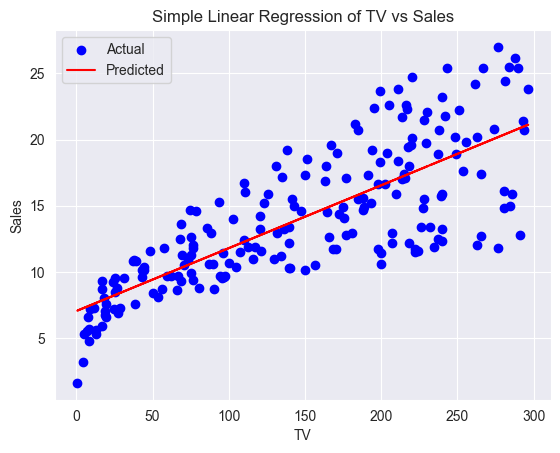

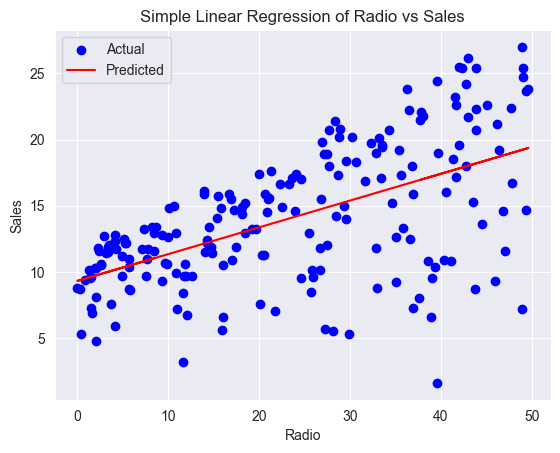

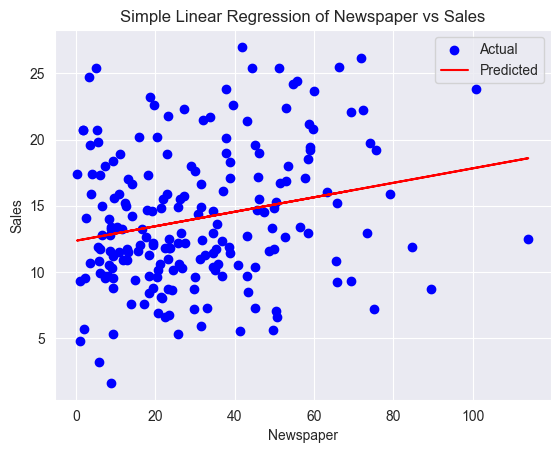

In [85]:
# 5 En todos los casos analizar la influencia de cada variable en las ventas.
import matplotlib.pyplot as plt


def plot_simple_linear_regression(data, independent_vars, dependent_var):
    """
    Performs simple linear regression for each independent variable and plots the results.
    """
    for var in independent_vars:
        # Independent and Dependent Variables
        X = data[[var]]
        y = data[dependent_var]

        # Simple Linear Regression
        model = SimpleLinearRegression()
        model.fit(X, y)

        # Predictions
        predictions = model.predict(X)

        # Plotting
        plt.scatter(X, y, color='blue', label='Actual')
        plt.plot(X, predictions, color='red', label='Predicted')
        plt.title(f'Simple Linear Regression of {var} vs {dependent_var}')
        plt.xlabel(var)
        plt.ylabel(dependent_var)
        plt.legend()
        plt.show()

independent_vars = ['TV', 'Radio', 'Newspaper']
dependent_var = 'Sales'
plot_simple_linear_regression(data, independent_vars, dependent_var)

# TV vs Sales: 
# This plot shows a strong positive linear relationship between TV advertising budget and Sales.
# As the TV budget increases, Sales also tend to increase. The fit of the model appears quite good,
# showing that TV advertising is a significant predictor of Sales.

# Radio vs Sales: 
# The Radio plot also shows a positive relationship with Sales, but the scatter of points is wider 
# than in the TV plot, indicating more variability in the Sales response to changes in the Radio 
# advertising budget. Nonetheless, Radio still appears to be a meaningful predictor of Sales.

# Newspaper vs Sales: 
# The relationship between Newspaper advertising and Sales is the weakest among the three.
# The scatter plot shows a lot of variability and the linear relationship is not as defined.


In [86]:
# 5 En todos los casos analizar la influencia de cada variable en lasventas.
# Multi Linear Regression

feature_names = X.columns

# Coefficients
coefficients = multiple_lr.coef_

coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Display the DataFrame
coefficients_df

# TV: 
# A coefficient of 0.045765 shows that a unit increase in TV advertising budget 
# is associated with an increase in sales of approximately 45.765 units.

# Radio: 
# With a coefficient of 0.188530, this suggests a more substantial positive influence 
# on sales than TV.

# Newspaper: 
# The coefficient is -0.001037. A unit increase in Newspaper advertising budget 
# corresponds to a decrease in sales of approximately 1.037 units.


,Feature,Coefficient
0,TV,0.045765
1,Radio,0.188530
2,Newspaper,-0.001037


In [87]:
# 6 confusion matrix, accuracy, precision, and recall, for the simple regression model

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Assuming data is a DataFrame with 'TV' as the independent variable and 'Sales' as the dependent variable.

# Define a threshold for classification
threshold = 10 

# Initialize and train the SimpleLinearRegression model
simple_lr_model = SimpleLinearRegression()
simple_lr_model.fit(X_train.values.reshape(-1, 1), y_train.values)

# Predict the 'Sales' using the fitted model
predicted_sales = simple_lr_model.predict(X_test.values.reshape(-1, 1))

# Classify predictions and actual values
predicted_classes = [1 if p > threshold else 0 for p in predicted_sales]
actual_classes = [1 if value > threshold else 0 for value in y_test]

# Calculate the confusion matrix
conf_matrix = confusion_matrix(actual_classes, predicted_classes)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(actual_classes, predicted_classes)
precision = precision_score(actual_classes, predicted_classes)
recall = recall_score(actual_classes, predicted_classes)

# Print the results
print("Confusion Matrix", "\n", conf_matrix_multi, "\n", "Accuracy:", accuracy_multi, "\n", "Precision:", precision_multi, "\n", "Recall:", recall_multi)



Confusion Matrix 
 [[ 35  10]
 [ 14 141]] 
 Accuracy: 0.88 
 Precision: 0.9337748344370861 
 Recall: 0.9096774193548387


In [88]:
# 6 confusion matrix, accuracy, precision, and recall, for the simple regression model

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Define a threshold for classification
threshold = 10 

# Using the multiple linear regression model
X = data.drop(['Sales', 'Unnamed: 0'], axis=1)  # Using all predictors except 'Sales' and 'Unnamed: 0'
y = data['Sales']

# Fit the model
multi_model = MultipleLinearRegression()
multi_model.fit(X, y)

# Predict and classify the results
predictions_multi = multi_model.predict(X)
predicted_classes_multi = [1 if p > threshold else 0 for p in predictions_multi]

# Classify the actual values
actual_classes_multi = [1 if value > threshold else 0 for value in y]

# Calculate the confusion matrix
conf_matrix_multi = confusion_matrix(actual_classes_multi, predicted_classes_multi)

# Calculate accuracy, precision, and recall
accuracy_multi = accuracy_score(actual_classes_multi, predicted_classes_multi)
precision_multi = precision_score(actual_classes_multi, predicted_classes_multi)
recall_multi = recall_score(actual_classes_multi, predicted_classes_multi)

# Print the results
print("Confusion Matrix", "\n", conf_matrix_multi, "\n", "Accuracy:", accuracy_multi, "\n", "Precision:", precision_multi, "\n", "Recall:", recall_multi)


Confusion Matrix 
 [[ 35  10]
 [ 14 141]] 
 Accuracy: 0.88 
 Precision: 0.9337748344370861 
 Recall: 0.9096774193548387
